In [2]:
import tensorflow as tf
import pandas as pd
import os 
import glob
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
from zipfile import ZipFile

In [4]:
with ZipFile("clothing-dataset-small.zip", 'r') as zObject: 
  
    # Extracting all the members of the zip  
    # into a specific location. 
    zObject.extractall(path="C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Introduction to Computer Vision(CNN)\\data") 

In [5]:
path = "C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Introduction to Computer Vision(CNN)\\data\\clothing-dataset-small"
class_dict = os.listdir(path+"\\"+"train")

image_dict = {}
count_dict = {}

for cls in class_dict:
    file_path = glob.glob(f'C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Introduction to Computer Vision(CNN)\\data\\clothing-dataset-small\\train\\{cls}\\*')
    count_dict[cls] = len(file_path)

    image_path = random.choice(file_path)

    image_dict[cls] =  tf.keras.utils.load_img(image_path)


In [6]:
image_dict

{'dress': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533>,
 'hat': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x534>,
 'longsleeve': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533>,
 'outwear': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x537>,
 'pants': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x867>,
 'shirt': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533>,
 'shoes': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x534>,
 'shorts': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533>,
 'skirt': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=533x400>,
 't-shirt': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533>}

In [7]:
count_dict

{'dress': 241,
 'hat': 123,
 'longsleeve': 455,
 'outwear': 184,
 'pants': 468,
 'shirt': 290,
 'shoes': 198,
 'shorts': 202,
 'skirt': 112,
 't-shirt': 795}

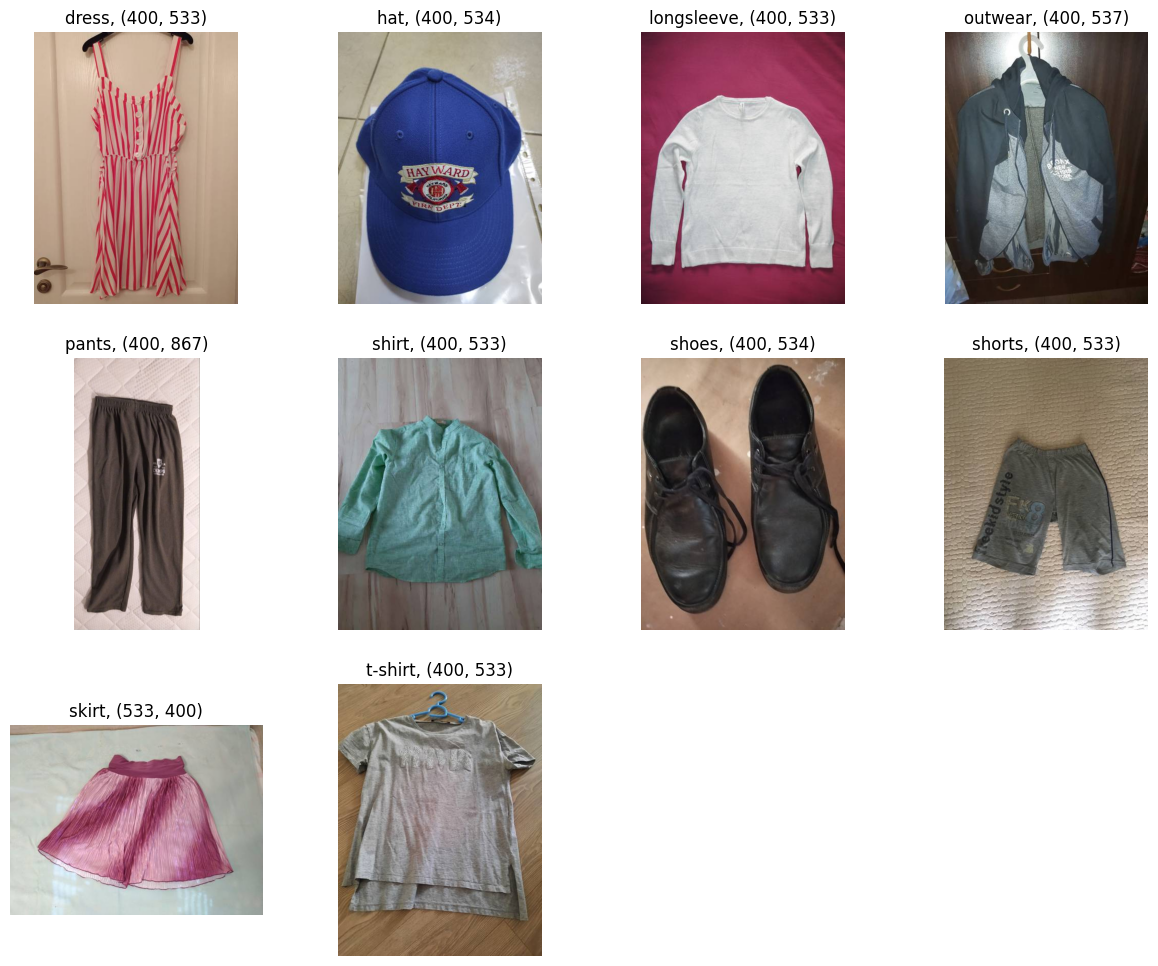

In [8]:
plt.figure(figsize=(15,12))
for i, (cls,img) in enumerate(image_dict.items()):
    plt.subplot(3,4,i+1)
    plt.imshow(img)

    plt.title(f'{cls}, {img.size}')

    plt.axis("off")
    

# loading data through keras API

In [9]:
train_data = tf.keras.utils.image_dataset_from_directory("C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Introduction to Computer Vision(CNN)\\data\\clothing-dataset-small\\train",shuffle=True)
val_data = tf.keras.utils.image_dataset_from_directory("C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Introduction to Computer Vision(CNN)\\data\\clothing-dataset-small\\validation",shuffle=True)
test_data = tf.keras.utils.image_dataset_from_directory("C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Introduction to Computer Vision(CNN)\\data\\clothing-dataset-small\\test",shuffle=True)

Found 3068 files belonging to 10 classes.
Found 341 files belonging to 10 classes.
Found 372 files belonging to 10 classes.


# Data Preprocessing

In [10]:
h,w = 128,128
data_preprocess_with_flatten = tf.keras.Sequential(
    [
        tf.keras.layers.Resizing(h,w),
        tf.keras.layers.Rescaling(1./255),

    ]
)

train_data = train_data.map(lambda x,y : (data_preprocess_with_flatten(x),y))
val_data = val_data.map(lambda x,y : (data_preprocess_with_flatten(x),y))
test_data = test_data.map(lambda x,y : (data_preprocess_with_flatten(x),y))

In [11]:
next(iter(train_data))[0]

<tf.Tensor: shape=(32, 128, 128, 3), dtype=float32, numpy=
array([[[[0.2892728 , 0.20691985, 0.12848847],
         [0.29588464, 0.21353169, 0.1351003 ],
         [0.31159016, 0.22923723, 0.15080585],
         ...,
         [0.3617724 , 0.23824297, 0.13340227],
         [0.36734653, 0.24779993, 0.12396415],
         [0.37669924, 0.2604615 , 0.10862326]],

        [[0.2980387 , 0.21568576, 0.14509751],
         [0.295522  , 0.21316907, 0.14258082],
         [0.3078146 , 0.22546166, 0.15487343],
         ...,
         [0.38390565, 0.26037624, 0.15553553],
         [0.38409606, 0.2645495 , 0.14071369],
         [0.38677752, 0.2705398 , 0.11870154]],

        [[0.28555736, 0.19928285, 0.14438088],
         [0.28143066, 0.19515616, 0.14025418],
         [0.2937703 , 0.2074958 , 0.15259382],
         ...,
         [0.37246454, 0.24893513, 0.14409444],
         [0.37408343, 0.25453684, 0.13070105],
         [0.3727482 , 0.25651044, 0.10467219]],

        ...,

        [[0.40420097, 0.4146866 ,

In [12]:
n_classes = 10
hidden_size_1 = 1024
hidden_size_2 = 256

model = tf.keras.models.Sequential([

    tf.keras.layers.Flatten(input_shape = (h,w,3)),
    tf.keras.layers.Dense(units=hidden_size_1, activation='relu'),
    tf.keras.layers.Dense(units=hidden_size_2, activation='relu'),
    tf.keras.layers.Dense(units = n_classes, activation='softmax')

])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 1024)              50332672  
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 50,597,642
Trainable params: 50,597,642
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
epochs = 10
model_fit = model.fit(train_data, validation_data=val_data, epochs=epochs)

Epoch 1/10


96/96 [==============================] - 7s 51ms/step - loss: 16.0845 - accuracy: 0.2220 - val_loss: 2.9220 - val_accuracy: 0.2757
Epoch 2/10
96/96 [==============================] - 3s 34ms/step - loss: 2.7395 - accuracy: 0.3292 - val_loss: 2.0545 - val_accuracy: 0.4135
Epoch 3/10
96/96 [==============================] - 3s 33ms/step - loss: 2.0037 - accuracy: 0.4084 - val_loss: 2.3648 - val_accuracy: 0.3167
Epoch 4/10
96/96 [==============================] - 3s 34ms/step - loss: 1.9199 - accuracy: 0.4214 - val_loss: 1.7971 - val_accuracy: 0.4282
Epoch 5/10
96/96 [==============================] - 4s 35ms/step - loss: 1.6185 - accuracy: 0.4873 - val_loss: 1.9101 - val_accuracy: 0.4487
Epoch 6/10
96/96 [==============================] - 3s 33ms/step - loss: 1.5873 - accuracy: 0.5088 - val_loss: 1.6939 - val_accuracy: 0.4575
Epoch 7/10
96/96 [==============================] - 3s 33ms/step - loss: 1.5010 - accuracy: 0.5169 - val_loss: 1.6215 - val_accuracy: 0.4487
Epoch 8/10
96/96 [=====

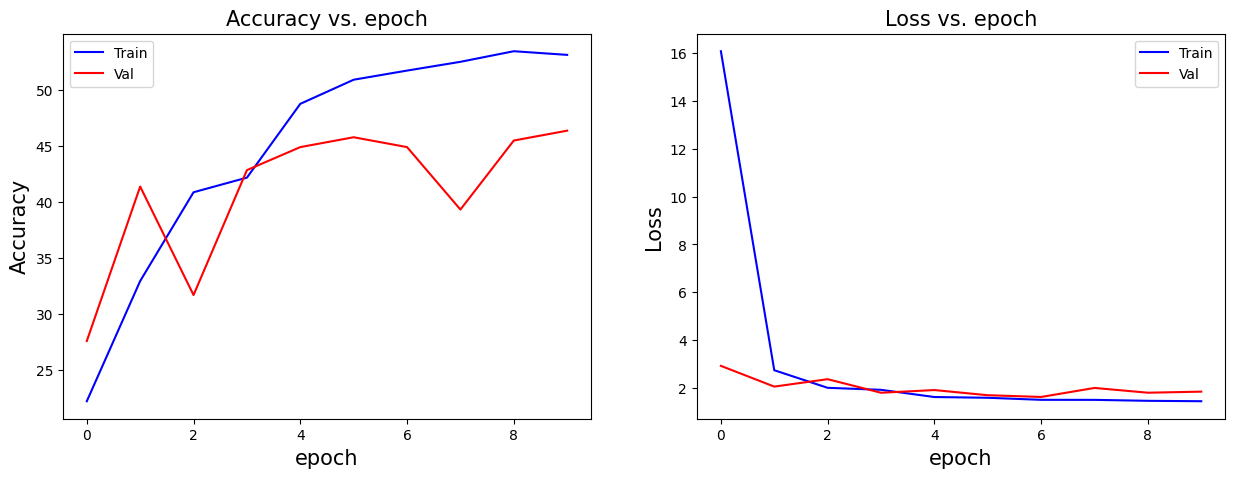

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

In [17]:
n_classes = 10
hidden_size_2 = 256

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=16,kernel_size=3,strides=1,padding="same",activation="relu",input_shape=(h,w,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=hidden_size_2, activation='relu'),
    tf.keras.layers.Dense(units = n_classes, activation='softmax')

])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               16777472  
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 16,780,490
Trainable params: 16,780,490
Non-trainable params: 0
__________________________________________

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
epochs = 10
model_fit = model.fit(train_data, validation_data=val_data, epochs=epochs)

Epoch 1/10


96/96 [==============================] - 6s 30ms/step - loss: 2.5100 - accuracy: 0.3478 - val_loss: 1.8763 - val_accuracy: 0.4047
Epoch 2/10
96/96 [==============================] - 3s 30ms/step - loss: 1.4122 - accuracy: 0.5505 - val_loss: 1.5765 - val_accuracy: 0.5132
Epoch 3/10
96/96 [==============================] - 3s 31ms/step - loss: 0.9671 - accuracy: 0.7001 - val_loss: 1.4291 - val_accuracy: 0.5572
Epoch 4/10
96/96 [==============================] - 3s 30ms/step - loss: 0.6041 - accuracy: 0.8188 - val_loss: 1.3668 - val_accuracy: 0.5777
Epoch 5/10
96/96 [==============================] - 3s 30ms/step - loss: 0.3303 - accuracy: 0.9179 - val_loss: 1.5001 - val_accuracy: 0.5924
Epoch 6/10
96/96 [==============================] - 3s 30ms/step - loss: 0.1848 - accuracy: 0.9671 - val_loss: 1.6083 - val_accuracy: 0.5924
Epoch 7/10
96/96 [==============================] - 3s 30ms/step - loss: 0.0949 - accuracy: 0.9899 - val_loss: 1.6496 - val_accuracy: 0.5836
Epoch 8/10
96/96 [======

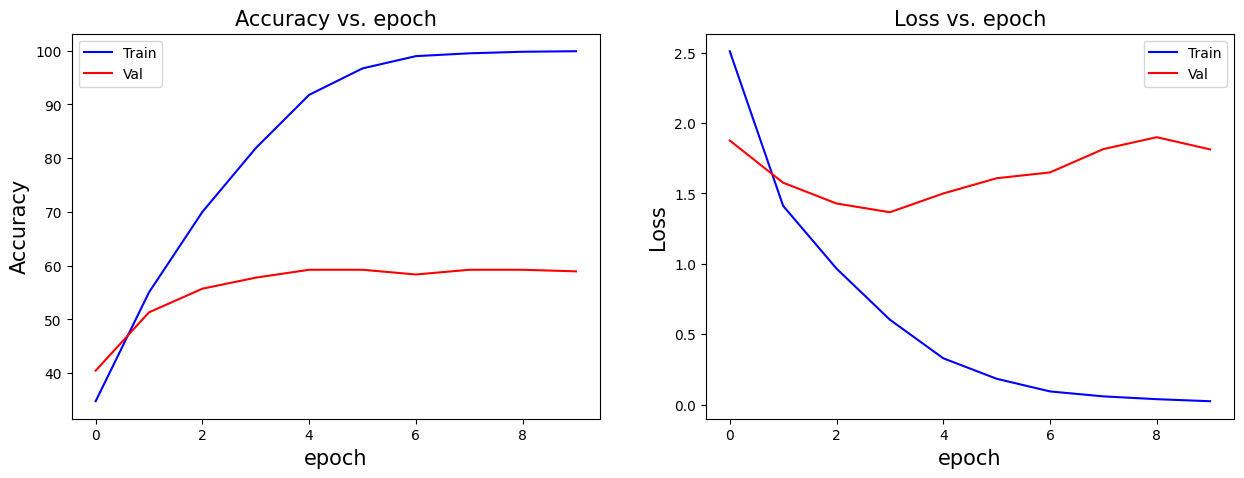

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

In [22]:
from sklearn.metrics import accuracy_score
true_categories = tf.concat([y for x, y in test_data], axis=0)
images = tf.concat([x for x, y in test_data], axis=0)
y_pred = model.predict(test_data)
#class_names = test_data.class_names
predicted_categories = tf.argmax(y_pred, axis=1)

test_acc = accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')

12/12 [==============================] - 1s 27ms/step

Test Accuracy: 12.10%



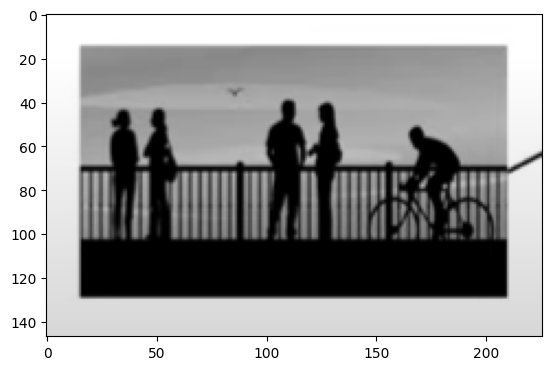

In [4]:
import cv2
img = cv2.imread('cycle_people.png')
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


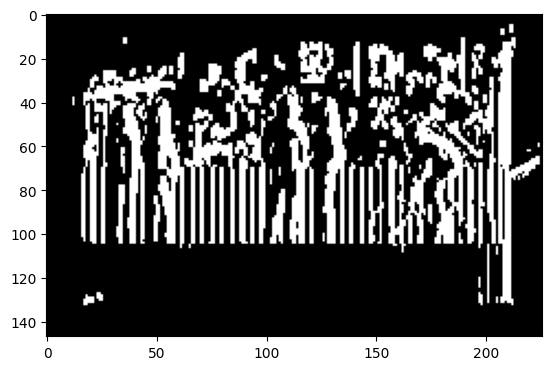

In [5]:
output = cv2.Sobel(img, ddepth = cv2.CV_64F, dx = 1, dy = 0, ksize = 3)

# Displaying the output image
plt.imshow(output)